<a href="https://colab.research.google.com/github/PARODBE/MASTER-IA/blob/main/Guasones_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Guasones_Team is composed of:

- **Rafael Peris**: Rafa has been working on the Batmobile weapons team when Robin was not even born. He is Alfred's best friend.
- **Borja Ramón Gómez**: Borja is the last member of the Guason work team, but no less important, he has been in charge of giving it a more wild touch away from the typical line of the 80's. Bruce is tremendously satisfied.
- **Pablo Rodríguez Belenguer**: Pablo has mainly been in charge of all the software part of the Batmobile, sometimes he plays a joke on Bruce as if the Batmobile were Knight Rider, he always creates a good atmosphere in the Guason team.


In the photo below you can see us checking that the Batmobile works correctly and of course dressed up on Halloween.

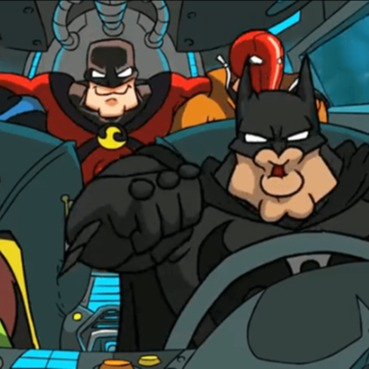

Hi Guys Cristopher Nolan is here. Don't talk about this, but I am making a new Batman movie and I need your help to design the new Batmobile. For this ocassion I would like you to design it as several Python Classes.

Design the main Batmobile class with the following attributes: Pilot (It could be Batman or Robin), number of batrockets loaded, number of pem (this are electromagnetic pulses to counter the Joker weapons) uses left, liters of gas left in the batmobile.

Add the following methods to the Batmobile class: A method to accelerate the batmobile and drive for some distance, a method to activate the turbo and drive for some distance faster than the normal method, a method to launch a rocket to a Joker colleague, a method to launch a pem use.

Create the following classes to interact with the Batmobile: Joker, Joker Villain, Rocket, PEM Pulse.

The Joker and Jokker Villain class should have a parameter called KO which will turn to True when they receive a Rocket. They also have a parameter called Weapon which should turn to false if they receive a PEM Pulse.

The Rocket and PEM Pulse are the ammunition of the Batmobile, the car can only use the weapons if it has ammunition in the arsenal. Si se quedan sin munición

Finally draw a diagram of the classes using diagram.io showing how they interact.

Se propone la siguiente distribución de la carga de trabajo:

Un estudiante podría diseñar la clase del batmóvil. Mientras sus dos compañeros podrían desarrollar las clases relacionadas con el armamento del mismo y los distintos villanos descritos.
Una vez desarrolladas las piezas de código por separado se procedería a la integración en equipo de todo el sistema.
Uno de los estudiantes (aquel con menor carga en programación) desarrollaría el diagrama de la pieza de software.

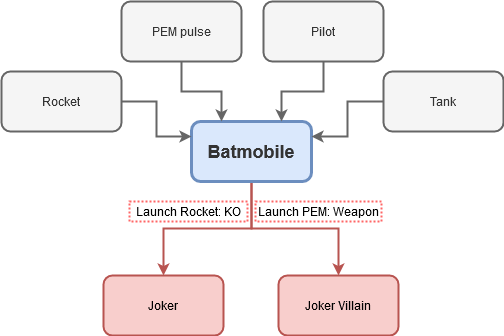

In [ ]:
import random as rnd

class Rocket:
  def __init__(self):
    self.Used = False

class PEM_Pulse:
  def __init__(self):
    self.Used = False

class Joker:
  def __init__(self):
    self.KO = False
    self.Weapon = True


class Joker_Villain:
  def __init__(self):
    self.KO = False
    self.Weapon = True


class Pilot:
  def __init__(self, pilot):
    self.pilot=pilot

  def describe_pilot(self):
    print('Hi Alfred, please confirm who is driving the Batmobile.')
    print(f'Ok, the pilot is {self.pilot}.')


class Tank:
  def __init__(self,balance=0):
    self.balance = balance

  def _gas_consume(self, amount):
    self.balance -= amount

  def refueling(self, amount):
    self.balance += amount

  def gas_describe(self):
    print(f'Alfred, we only have {self.balance} liters of gasoline left. Please tell me how long I have to get to the Batcave.')

    
class Batmobile:
  def __init__(self, pilot=Pilot('Batman'), tank=Tank(100)):
    #Asignacion
    self.pilot = pilot
    self.tank = tank
    self._list_rockets = []
    self._list_pem = []


    # Initialitation
    self.velocity = 0
    self.orientation = [0]
    self.distance = [0]

    for i in range(rnd.randrange(2,20,2)):
      self._list_rockets.append(Rocket())

    for i in range(rnd.randrange(1,5,1)):
      self._list_pem.append(PEM_Pulse())

    # Car Specs
    self.turbo_secs = 20
    self.vel_limit = 55 #In m/s -> Around 200 km/h
    self.consumption = 6e-4 #In L/m -> Around 60 L/100km

  # Movement-related methods: _gas_consume, drive (straight), turn (change of orientation), accelerate, turbo, describe_traj

  def accelerate(self, a, t):
    new_vel = self.velocity+a*t
    if new_vel>self.vel_limit:
      t = (self.vel_limit-self.velocity)/a
      new_vel = self.vel_limit
      print('Alert: Speed limit reached.')
    self.drive(t,a)
    self.velocity = new_vel

  def _gas_consume(self, metres):
    cons = metres*self.consumption
    if cons>self.tank.balance:
      cons = self.vel_limit
      print('Alert: Run out of gas.')
      self.accelerate(-2,self.velocity/2) 
    self.tank._gas_consume(cons)
    print(f'Remaining gas: {self.tank.balance} L.')
    return cons/self.consumption
  
  def drive(self, t, a=0):
    dist = self.velocity*t+a*t**2
    dist = self._gas_consume(dist)
    self.distance.append(dist)
    self.orientation.append(self.orientation[-1])
  
  def turn(self, degree):
    new_or = self.orientation[-1]+degree%360
    self.orientation.append(new_or)
    self.distance.append(0)

  def turbo(self, seconds):
    if self.turbo_secs==0:
      print('Alert: Run out of turbo.')
    else:
      if self.turbo_secs<seconds:
        seconds=self.turbo_secs
      self.turbo_secs -= seconds
      self.velocity *= 2
      self.drive(seconds)
      vel = self.velocity*2.23694
      print(f'Alfred, the Batmobile is going to freak out! When I put the Nitro, it catches {round(vel)} miles per hour!')
      self.velocity /= 2
      print(f'Remaining turbo activation time: {self.turbo_secs} s.')

  def describe_traj(self):
    print(f'The vector of traveled distance is: {self.distance} (meters).')
    print(f'The vector of orientation is: {self.orientation} (degrees).')

  # Weapon-related methods: launch_rocket and launch_pem

  def Launch_Rocket(self, target):
    if (isinstance(target, (Joker, Joker_Villain))):
      self.n_rockets = len(self._list_rockets)
      for rocket in self._list_rockets:
        if (not rocket.Used):
          rocket.Used = True
          target.KO = True
          print("Target eliminated.")
          break
        else:
          self.n_rockets -= 1
          if (self.n_rockets <= 0):
            print("Alert: Run out of BatRocket ammo.")

    else:
      print("Wrong target.")

  def Launch_PEM(self, target):
    if (isinstance(target, (Joker, Joker_Villian))):
      self.n_PEM = len(self._list_pem)
      for pem in self._list_pem:
        if (not pem.Used):
          pem.Used = True
          target.Weapon = False
          print("Weapons neutralized.")
          break
        else:
          self.n_PEM -= 1
          if (self.n_rockets <= 0):
            print("Alert: Run out of BatPEM pulses.")


In [ ]:
# Initialitation: default pilot->Batman, default tank->100 L
tank1 = Tank(100)
tank2 = Tank(100)
car1 = Batmobile(tank=tank1)
car2 = Batmobile(pilot=Pilot('Robin'),tank=tank2)

In [ ]:
car1.tank.balance

100

In [ ]:
car1.pilot.describe_pilot()
car2.pilot.describe_pilot()

Hi Alfred, please confirm who is driving the Batmobile.
Ok, the pilot is Batman.
Hi Alfred, please confirm who is driving the Batmobile.
Ok, the pilot is Robin.


In [ ]:
# Initial L of gasoline and velocity
print(f'Litres of gasoline: {car1.tank.balance} L.')
print(f'Initial velocity: {car1.velocity} m/s.')

Litres of gasoline: 100 L.
Initial velocity: 0 m/s.


In [ ]:
# If we try to drive now, we wont move since the velocity is 0, so we wont consume gas. The input is in seconds.
car1.drive(10)

Remaining gas: 100.0 L.


In [ ]:
# Then we have to increase velocity: accelerate at a=10 m/s^2 during 3 s
car1.accelerate(10,3)
print(f'Velocity after accelerating: {car1.velocity} m/s.')

Remaining gas: 99.946 L.
Velocity after accelerating: 30 m/s.


In [ ]:
car1.drive(100)

Remaining gas: 98.146 L.


In [ ]:
# We have introduced a method for turning a given angle:
car1.turn(45)
car1.drive(225)
car1.turn(45)
car1.accelerate(5,2)

Remaining gas: 94.096 L.
Remaining gas: 94.048 L.


In [ ]:
# Let us check the trajectory of the batmobile. The first vector gives us the discante traveled and the orientation one the direction the car is facing
car1.describe_traj()

The vector of traveled distance is: [0, 0.0, 90.0, 3000.0, 0, 6750.0, 0, 80.0] (meters).
The vector of orientation is: [0, 0, 0, 0, 45, 45, 90, 90] (degrees).


In [ ]:
car1.accelerate(10,2)

Alert: Speed limit reached.
Remaining gas: 93.9985 L.


In [ ]:
# The speed limit can be overcame with turbo
car1.velocity
car1.turbo(5)

Remaining gas: 93.66850000000001 L.
Alfred, the Batmobile is going to freak out! When I put the Nitro, it catches 246 miles per hour!
Remaining turbo activation time: 15 s.


In [ ]:
# Villains initialization
joker = Joker()
jok_vill_1 = Joker_Villain()
jok_vill_2 = Joker_Villain()
jok_vill_3 = Joker_Villain()

In [ ]:
car1.Launch_Rocket('Random villager')

Wrong target.


In [ ]:
print(f'KO status: {jok_vill_2.KO}')
print(f'Weapon status: {jok_vill_2.Weapon}')
car1.Launch_Rocket(jok_vill_2)
print(f'KO status {jok_vill_2.KO}')

KO status: False
Weapon status: True
Target eliminated.
KO status True
